In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re
sns.set()

In [ ]:
#Load data
purchasing = pd.read_csv("purchasing.csv")

stock = pd.read_csv("stock.csv")

In [ ]:
#How many purchases per component_number and how many negative purchases
purchasing = pd.read_csv("purchasing.csv")
purchasing['neg_purchase'] = purchasing['quantity'] < 0
purchasing.groupby(by='component_number').aggregate({'date':'count', 'quantity':'sum', 'neg_purchase':'sum'}).sort_values(by='neg_purchase', ascending=False)

,date,quantity,neg_purchase
component_number,,,
25,50,24100,18
347,17,36460,16
98,64,498949,14
1172,113,107415,14
149,37,1146026,13
...,...,...,...
482,85,37212,0
481,6,3000,0
480,29,26050,0


In [ ]:
#generate stock over time
componentNumber = 25
purchasing = pd.read_csv("purchasing.csv")
print(len(purchasing[purchasing['component_number'] == componentNumber]))
print("Negative purchases:", (purchasing[purchasing['component_number'] == componentNumber]['quantity'] < 0).any())
if len(stock.loc[stock['component_number'] == componentNumber, "quantity"]) > 0:
    startStock = int(stock.loc[stock['component_number'] == componentNumber, "quantity"])
    print(f'starting stock: {startStock}')
else:
    startStock = 0
purchasing = purchasing.set_index("date")
purchasing = purchasing.groupby(by=["component_number", "date"]).sum().reset_index().sort_values(by=['date','component_number'])
purchasing.index = purchasing['date']

stockOverTime = startStock + purchasing.loc[purchasing['component_number'] == componentNumber, "quantity"].cumsum()
stockOverTimeMonotonicallyIncreasing = pd.Series(index = stockOverTime.index, data = np.minimum.accumulate(stockOverTime[::-1]))

50
Negative purchases: True
starting stock: 4018


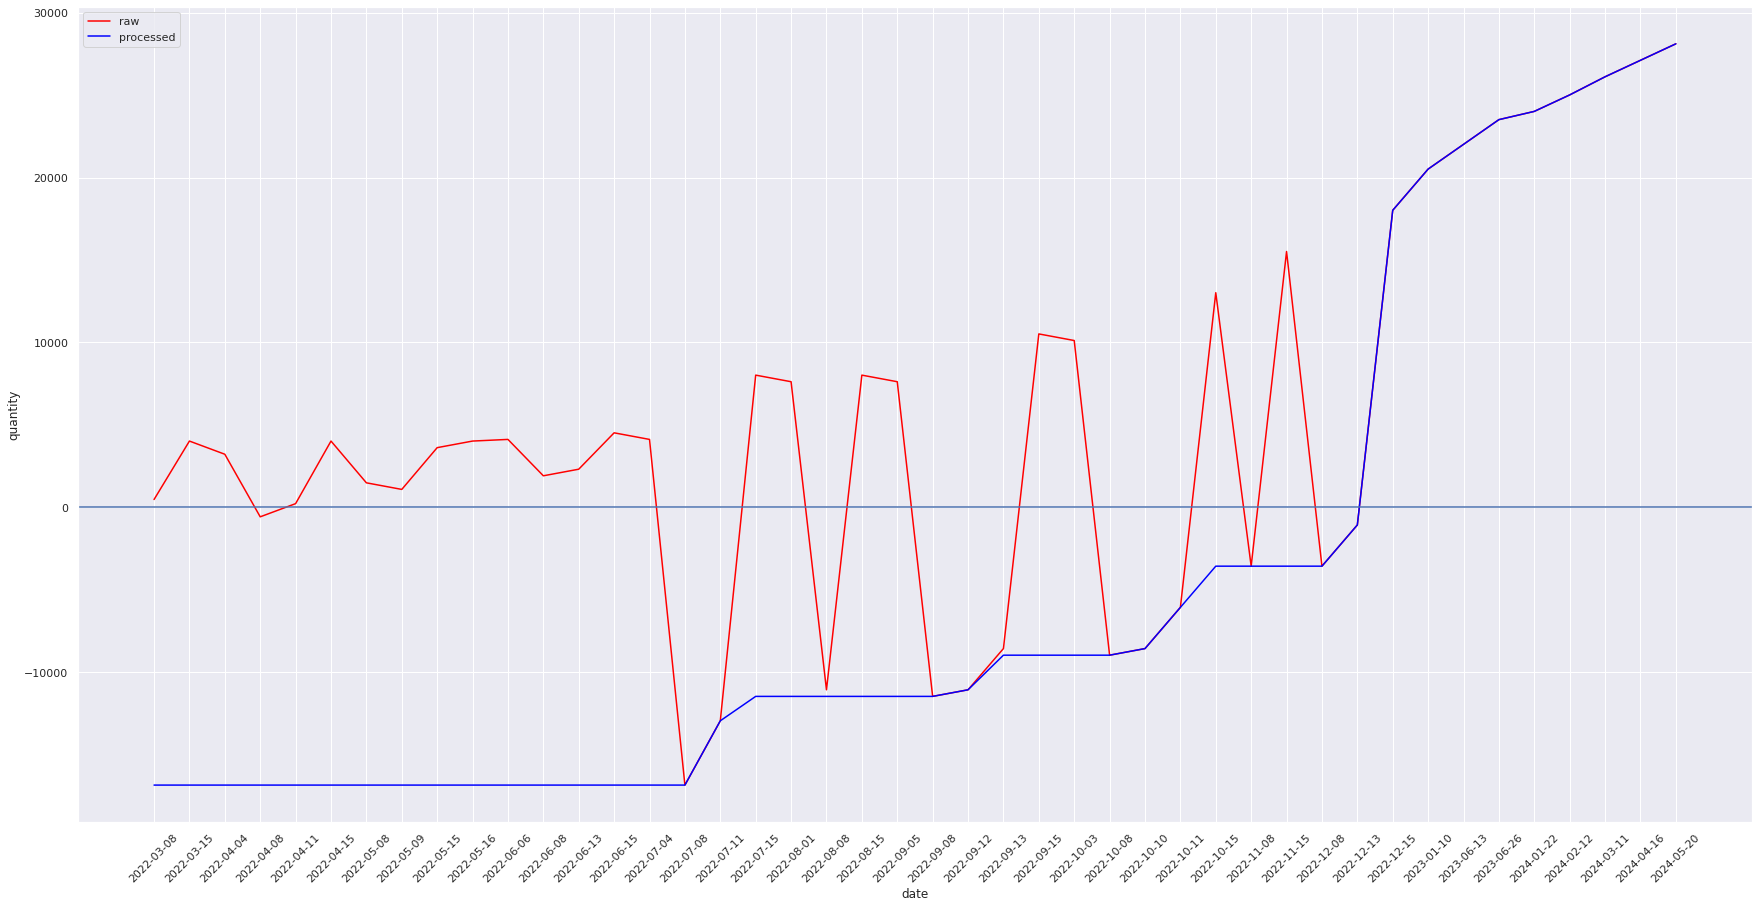

In [ ]:
plt.figure(figsize=(30,15))
sns.lineplot(x=stockOverTime.index, y=stockOverTime, color='red',label='raw')
sns.lineplot(x=stockOverTimeMonotonicallyIncreasing.index, y=stockOverTimeMonotonicallyIncreasing, color='blue', label='processed')
plt.legend()
plt.axhline(0)
plt.xticks(rotation=45);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c13a0ef3-1df8-492a-a20f-016ea2fd4dc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>